<a href="https://colab.research.google.com/drive/13mFW1u2GWNbBqBpk1610loN19DUCJqu9?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Preprocessing with TensorFlow

In this notebook, we will learn various image preprocessing techniques using TensorFlow. These techniques include resizing, flipping, adjusting brightness and contrast, changing hue, and normalizing images. We will use a class-based approach to encapsulate these functionalities.

- https://www.tensorflow.org/api_docs/python/tf/image


In [10]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import requests


## Load image

In [18]:
def load_image(image_path):
    if image_path.startswith('http'):
        response = requests.get(image_path)
        image = tf.image.decode_image(response.content, channels=3)
    else:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image


def display_image(image, title='Image'):
    plt.figure()
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

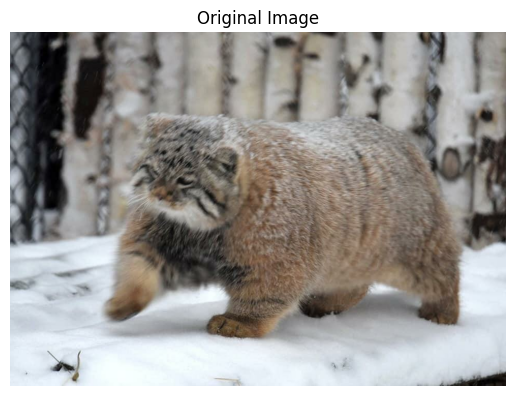

In [21]:
image_path_or_url = 'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg'

image = load_image(image_path)
display_image(image, title="Original Image")

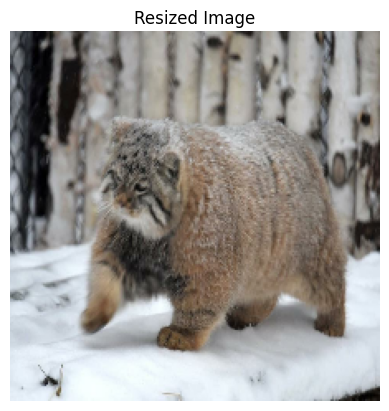

In [25]:
# https://www.tensorflow.org/api_docs/python/tf/image/resize

size = (224, 224)
resize_image = tf.image.resize(image, size)
display_image(resize_image, title="Resized Image")

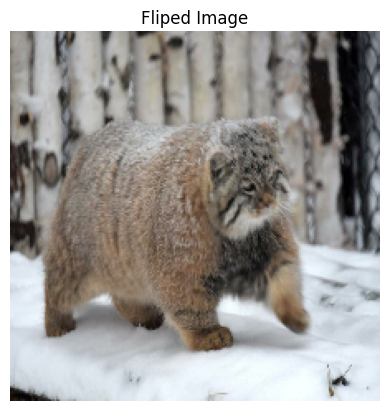

In [27]:
# https://www.tensorflow.org/api_docs/python/tf/image/flip_left_right
flipled_image = tf.image.random_flip_left_right(resize_image, seed=1)
display_image(flipled_image, title="Fliped Image")

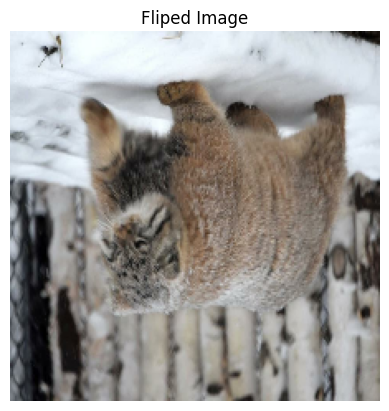

In [35]:
# https://www.tensorflow.org/api_docs/python/tf/image/flip_up_down
flipled_image = tf.image.flip_up_down(resize_image)
display_image(flipled_image, title="Fliped Image")

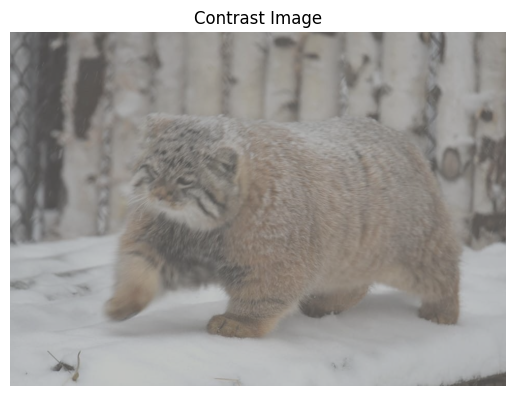

In [29]:
# https://www.tensorflow.org/api_docs/python/tf/image/random_contrast
img =  tf.image.random_contrast(image, lower=0.2, upper=0.5)
display_image(img, title="Contrast Image")

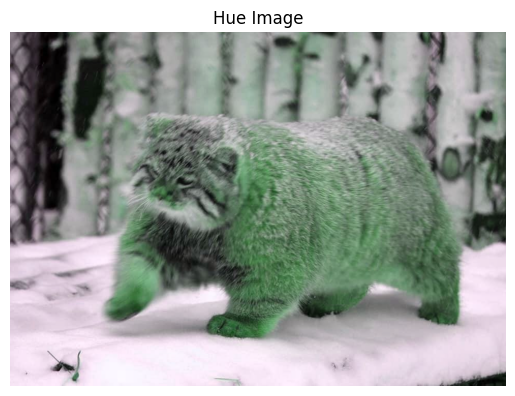

In [30]:
# https://www.tensorflow.org/api_docs/python/tf/image/random_hue
img =  tf.image.random_hue(image, max_delta=0.5)
display_image(img, title="Hue Image")

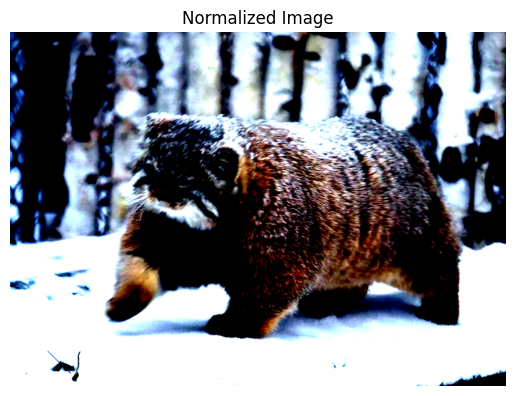

In [33]:
# Normalize image
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

mean = tf.constant(mean, dtype=image.dtype)
std = tf.constant(std, dtype=image.dtype)
img =  (image - mean) / tf.maximum(std, tf.keras.backend.epsilon())
display_image(img, title="Normalized Image")